In [3]:
import torch
import torch.optim as optim
import matplotlib.pyplot as plt
import torch.nn as nn
import numpy as np
import time
import matplotlib.pyplot as plt
import random

default_dtype = torch.float64
torch.set_default_dtype(default_dtype)

In [17]:
def grad(outputs, inputs):
    return torch.autograd.grad(
        outputs, inputs, grad_outputs=torch.ones_like(outputs), create_graph=True)

#Make an NN
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

class burgers(torch.nn.Module):
    def __init__(
        self,
        name,
        input_dim,
        output_dim,
        N=100,
        epochs=1000,
        viscosity=False,
        mu=0.00,
        #loss=nn.MSELoss(),
        lr=1e-4,
        #loss2=None,
        loss2_weight=0.1,
    ): #-> None:
        super().__init__()

        self.epochs = epochs
        #self.loss = loss
        self.loss2_weight = loss2_weight
        self.lr = lr
        self.mu=mu
        self.viscosity=viscosity
        self.N = N
        self.name=name

        self.layers = nn.Sequential(
            nn.Linear(input_dim, 20), #the linear transform part https://pytorch.org/docs/stable/generated/torch.nn.Linear.html
            nn.Tanh(), #the activation func I changed to tanh
            nn.Linear(20,20),
            nn.Tanh(),
            nn.Linear(20,20),
            nn.Tanh(),
            nn.Linear(20,20),
            nn.Tanh(),
            nn.Linear(20,20),
            nn.Tanh(),
            nn.Linear(20,20),
            nn.Tanh(),
            nn.Linear(20,20),
            nn.Tanh(),
            nn.Linear(20,20),
            nn.Tanh(),
            nn.Linear(20,20),
            nn.Tanh(),
            nn.Linear(20,20),
            nn.Tanh(),
        )
        self.out = nn.Linear(20, output_dim) #the final transform

    def forward(self, x):
        h = self.layers(x)
        out = self.out(h)
        return out


    def Train(self):
        print(self.N)

        inputinit = torch.column_stack((torch.tensor([random.random() for i in range(self.N)]), torch.zeros(self.N)))
        k=torch.hstack((torch.zeros(self.N), torch.ones(self.N)))
        inputboundary = torch.column_stack((k, torch.tensor([random.random() for i in range(2*self.N)])))
        outputinit=torch.sin(np.pi*inputinit[:,0])
        outputboundary= torch.zeros(2*self.N)
        inputs =torch.cat((inputinit, inputboundary))
        Outputs=torch.cat((outputinit, outputboundary))
        cpts = torch.column_stack((torch.tensor([random.random() for i in range(2*self.N)], requires_grad=True), torch.tensor([random.random() for i in range(2*self.N)], requires_grad=True)))

        start=time.time()
        optimiser = optim.Adam(self.parameters(), lr=self.lr)
        self.train() #https://stackoverflow.com/questions/51433378/what-does-model-train-do-in-pytorch


        def loss_g(inputs, outputs):
          loss=(inputs-outputs)**2
          return loss.mean()

        def loss_f(input):
          U=self.Model(input)[:,0]
          a=grad(U,input)[0]
          Ux=a[:,0]
          Ut=a[:,1]
          #Uxx=grad(Ux,input[0])
          return ((Ut+U*Ux)**2).mean()

        def loss_fv(input):
          U=self.Model(input)[:,0]
          a=grad(U,input)[0]
          Ux=a[:,0]
          Ut=a[:,1]
          Uxx=grad(Ux,input[0])
          return ((Ut+U*Ux-self.mu*Uxx)**2).mean()

          if self.viscosity==True:
            loss_f=loss_fv
          else:
            pass

        for ep in range(self.epochs):
            optimiser.zero_grad()
            outputs = self.forward(inputs)
            loss = loss_g(Outputs, outputs[:,0]) + loss_f(cpts)
            loss.backward()
            optimiser.step()
            if ep % int(self.epochs / 10) == 0:
                print(f"Epoch {ep}/{self.epochs}, loss_g: {loss_g(Outputs, outputs[:,0]).item():.8f}, loss_f: {loss_f(cpts).item():.8f}")
                print('time elapsed: {}'.format(time.time()-start))
                t=np.linspace(0,1,11)
                for tm in t:
                  xn=np.linspace(0,1,1000)
                  x=torch.tensor(xn, dtype=default_dtype)
                  coord=torch.column_stack((x,torch.full(x.shape, tm))) #https://pytorch.org/docs/stable/generated/torch.full.html
                  Uout=invsburgers.Model(coord).detach().numpy()
                  plt.plot(xn,Uout, label='t={}'.format(tm))
                  plt.legend()
                plt.show()
        return ()

    def Model(self, X):
        self.eval()
        out = self.forward(X)
        return out #.detach().cpu().numpy()


100
Epoch 0/30000, loss_g: 0.22997505, loss_f: 0.00000063
time elapsed: 0.01720285415649414


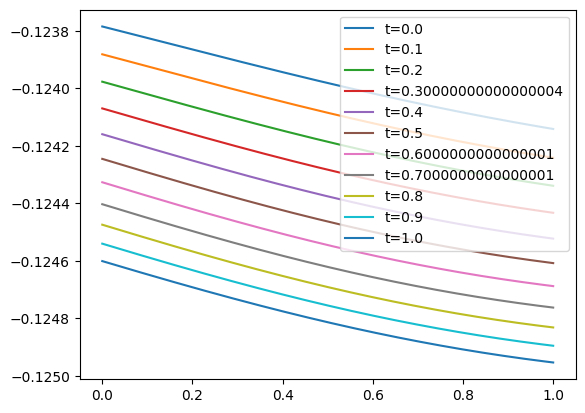

Epoch 3000/30000, loss_g: 0.03283134, loss_f: 0.00784862
time elapsed: 30.533989191055298


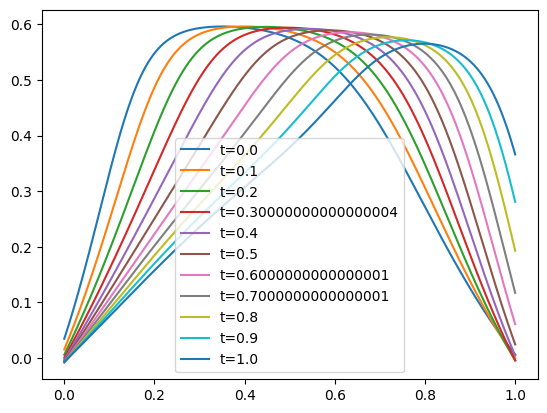

Epoch 6000/30000, loss_g: 0.01917060, loss_f: 0.00288865
time elapsed: 59.743765115737915


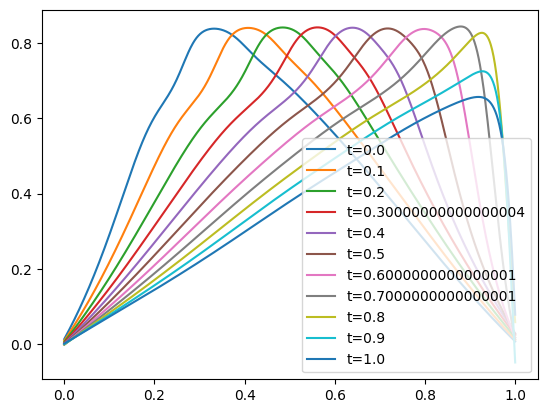

Epoch 9000/30000, loss_g: 0.01787105, loss_f: 0.00259107
time elapsed: 90.2582778930664


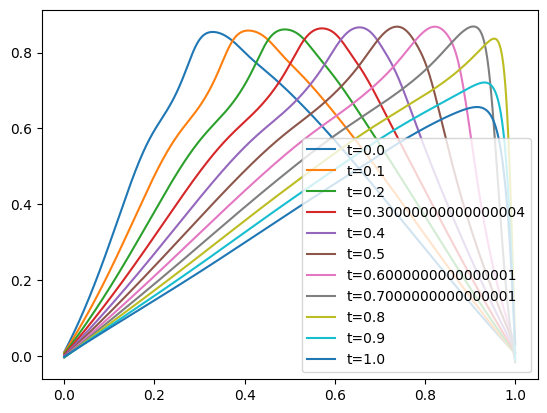

Epoch 12000/30000, loss_g: 0.01754837, loss_f: 0.00241703
time elapsed: 120.34496259689331


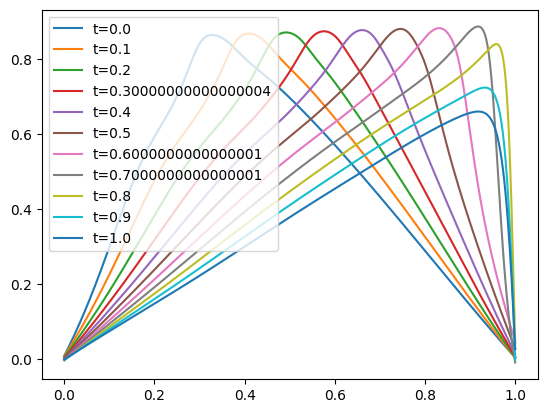

Epoch 15000/30000, loss_g: 0.01740491, loss_f: 0.00236214
time elapsed: 148.744708776474


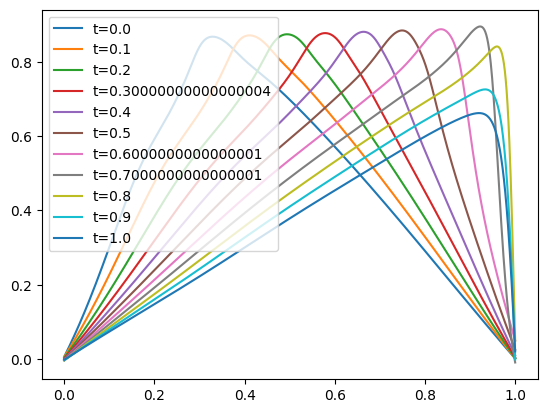

Epoch 18000/30000, loss_g: 0.01738511, loss_f: 0.00275563
time elapsed: 177.44050788879395


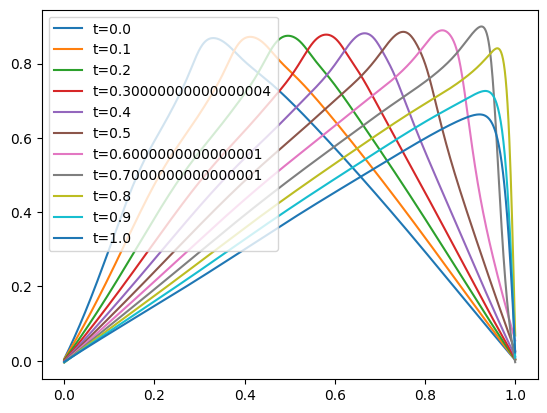

Epoch 21000/30000, loss_g: 0.01728543, loss_f: 0.00257566
time elapsed: 206.95844149589539


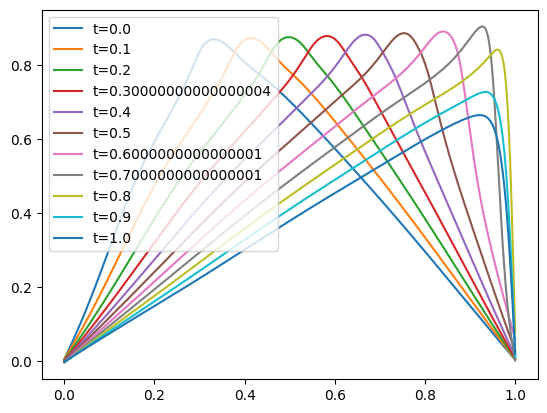

Epoch 24000/30000, loss_g: 0.01715947, loss_f: 0.00229888
time elapsed: 236.31693816184998


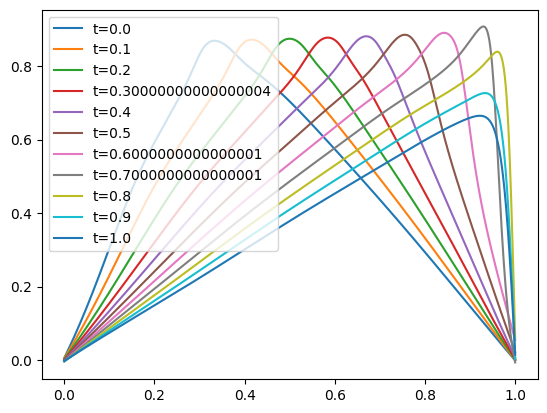

Epoch 27000/30000, loss_g: 0.01710982, loss_f: 0.00227520
time elapsed: 264.9561839103699


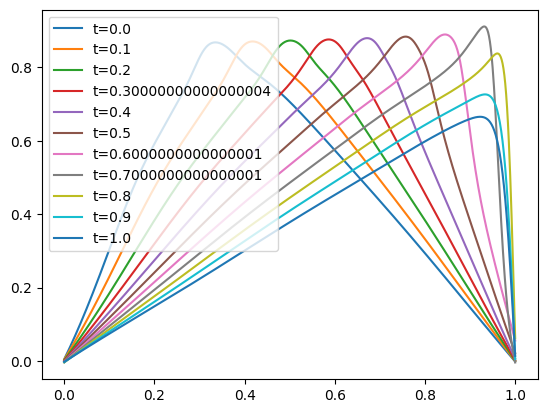

()

In [18]:
invsburgers=burgers("invsburgers",2,1,epochs=30000, lr=5e-5)
invsburgers.N
invsburgers.Train()

100
Epoch 0/30000, loss_g: 0.01433339, loss_f: 0.32973394
time elapsed: 0.02636122703552246


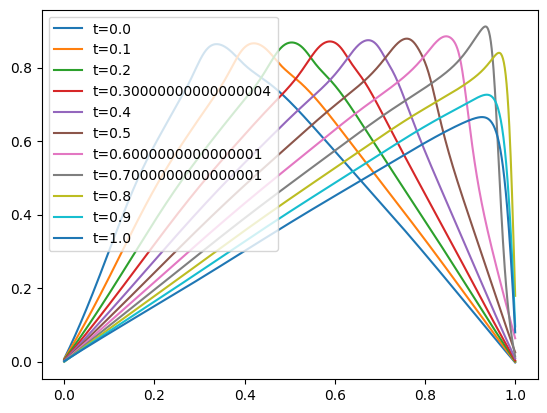

Epoch 3000/30000, loss_g: 0.01941271, loss_f: 0.00283769
time elapsed: 29.61141848564148


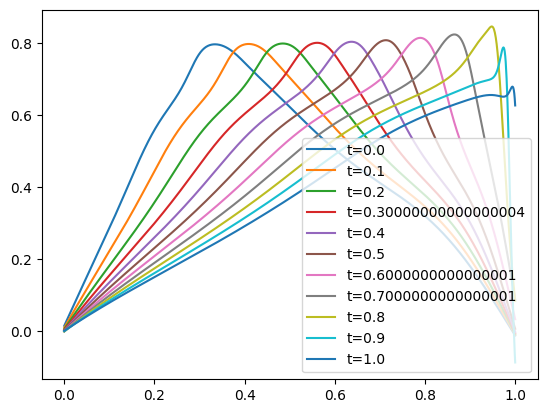

Epoch 6000/30000, loss_g: 0.01607448, loss_f: 0.00250142
time elapsed: 59.29892611503601


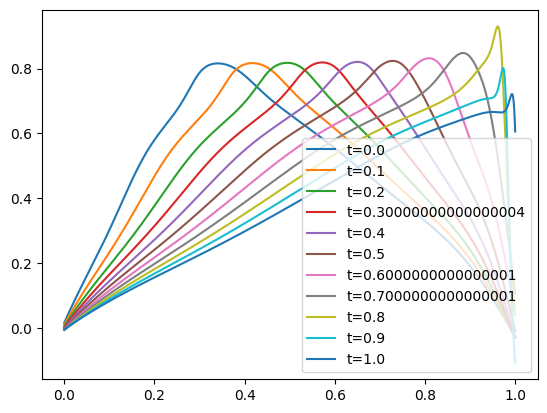

Epoch 9000/30000, loss_g: 0.01471834, loss_f: 0.00217934
time elapsed: 89.29794120788574


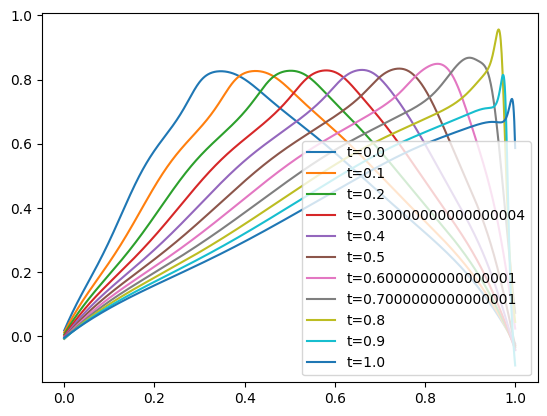

Epoch 12000/30000, loss_g: 0.01392726, loss_f: 0.00192551
time elapsed: 119.07036972045898


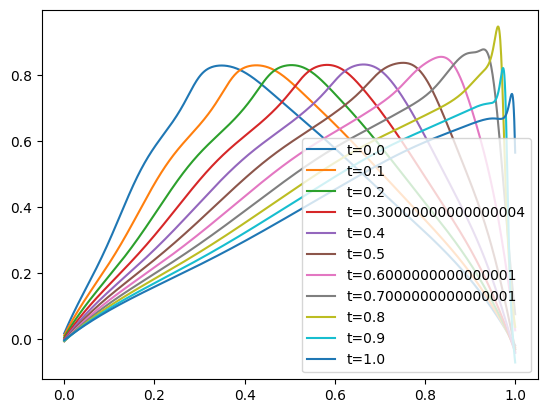

Epoch 15000/30000, loss_g: 0.01320841, loss_f: 0.00208076
time elapsed: 148.25687074661255


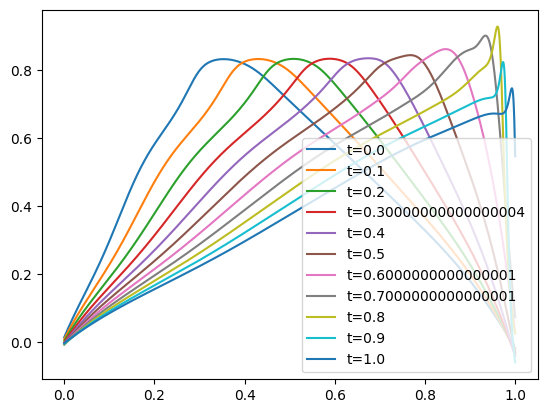

Epoch 18000/30000, loss_g: 0.01254337, loss_f: 0.00189112
time elapsed: 177.04348587989807


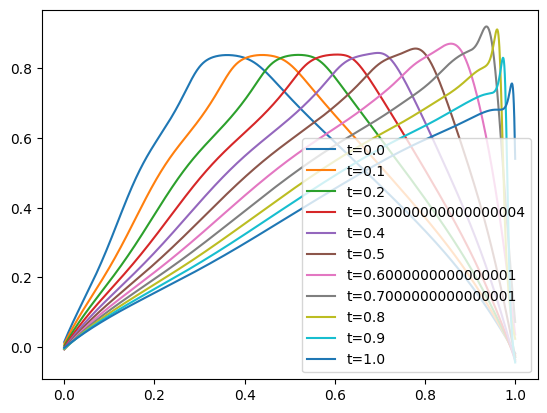

Epoch 21000/30000, loss_g: 0.01191176, loss_f: 0.00204831
time elapsed: 205.75519967079163


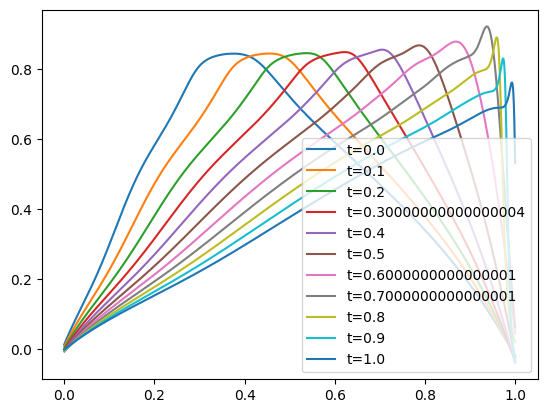

Epoch 24000/30000, loss_g: 0.01141885, loss_f: 0.00192931
time elapsed: 234.1803150177002


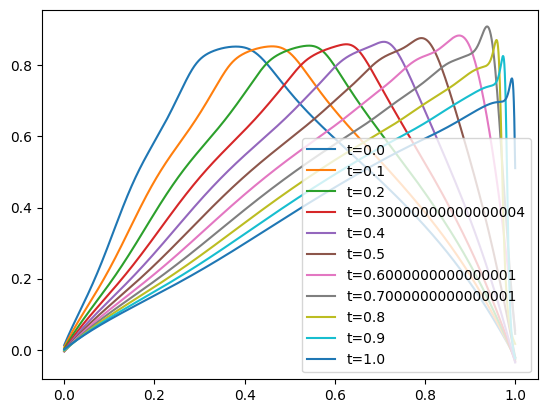

Epoch 27000/30000, loss_g: 0.01083056, loss_f: 0.00197549
time elapsed: 263.45078897476196


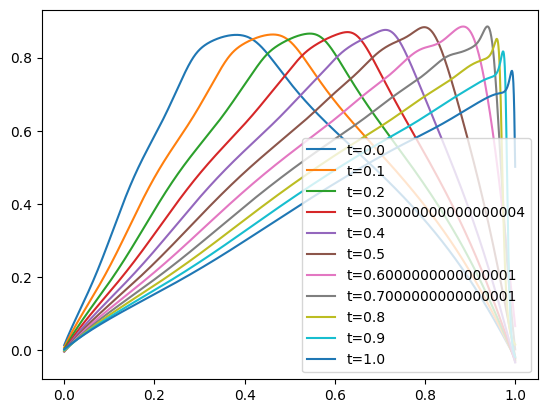

()

In [21]:
invsburgers.Train()

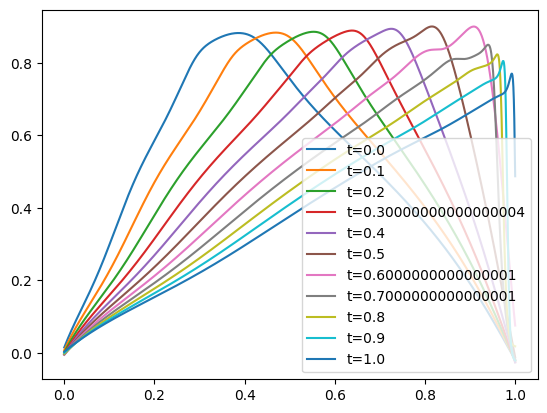

In [22]:
t=np.linspace(0,1,11)
for tm in t:
  xn=np.linspace(0,1,1000)
  x=torch.tensor(xn, dtype=default_dtype)
  coord=torch.column_stack((x,torch.full(x.shape, tm))) #https://pytorch.org/docs/stable/generated/torch.full.html
  Uout=invsburgers.Model(coord).detach().numpy()
  plt.plot(xn,Uout, label='t={}'.format(tm))
  plt.legend()
plt.show()

100
Epoch 0/30000, loss_g: 0.01210421, loss_f: 0.06392102
time elapsed: 0.026891469955444336


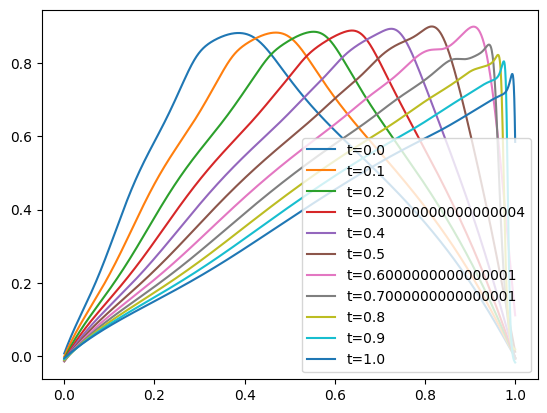

Epoch 3000/30000, loss_g: 0.00023079, loss_f: 0.00030636
time elapsed: 31.02149987220764


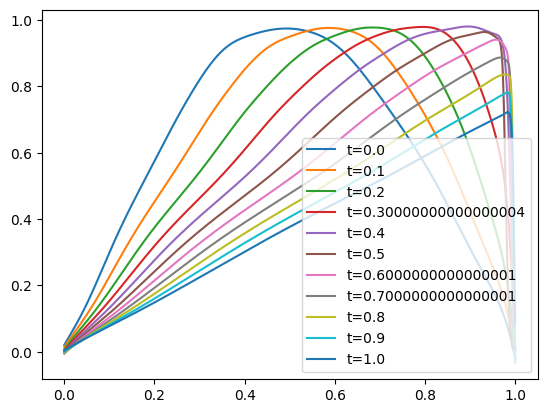

Epoch 6000/30000, loss_g: 0.00001830, loss_f: 0.00004331
time elapsed: 59.75538969039917


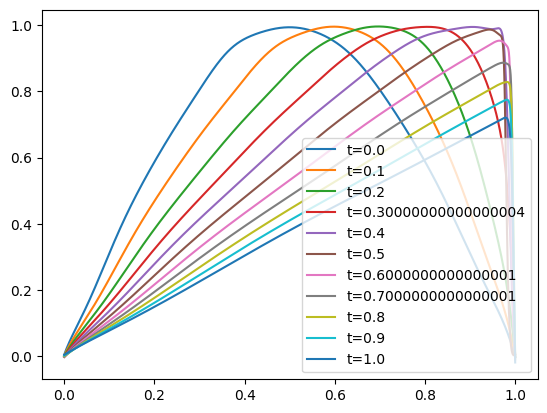

Epoch 9000/30000, loss_g: 0.00000829, loss_f: 0.00002217
time elapsed: 89.3643319606781


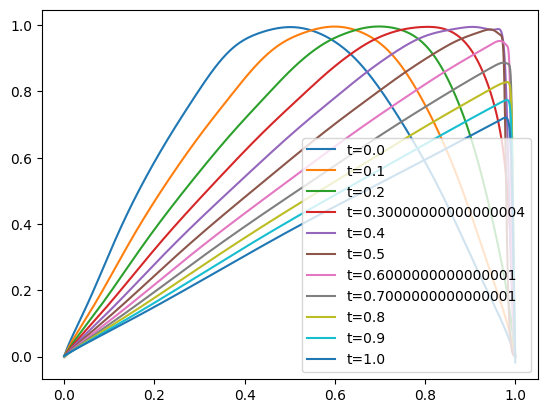

Epoch 12000/30000, loss_g: 0.00000415, loss_f: 0.00001272
time elapsed: 118.45834493637085


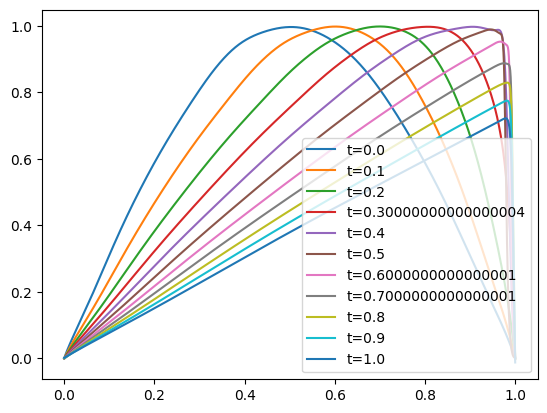

Epoch 15000/30000, loss_g: 0.00000295, loss_f: 0.00000869
time elapsed: 147.4221475124359


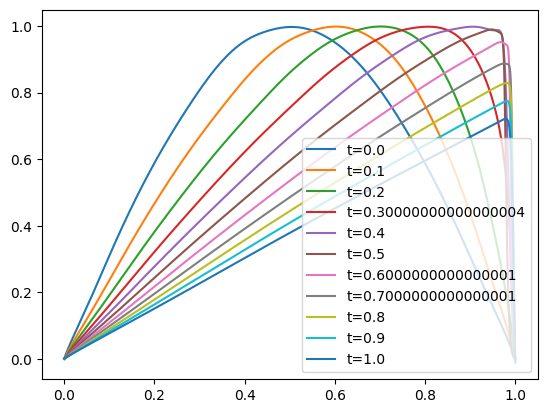

Epoch 18000/30000, loss_g: 0.00000548, loss_f: 0.00000881
time elapsed: 177.26249432563782


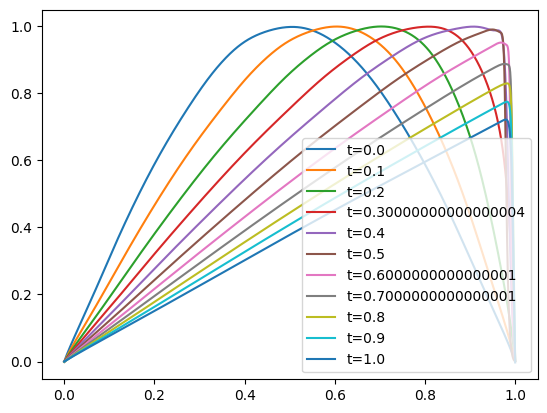

Epoch 21000/30000, loss_g: 0.00000143, loss_f: 0.00000462
time elapsed: 205.95669436454773


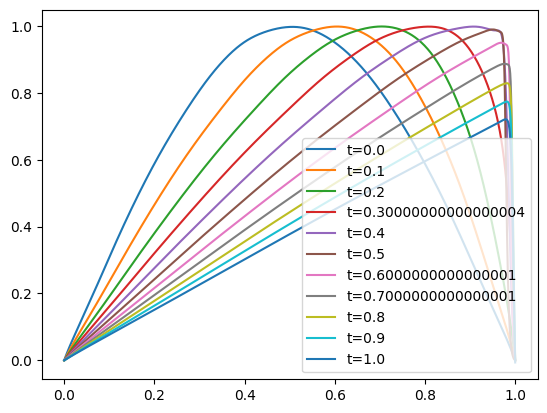

Epoch 24000/30000, loss_g: 0.00000112, loss_f: 0.00000359
time elapsed: 234.57582902908325


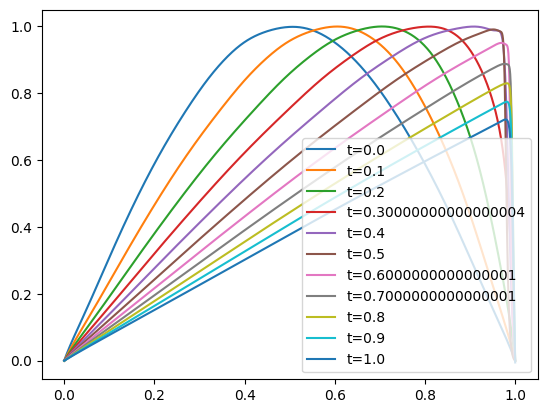

Epoch 27000/30000, loss_g: 0.00000112, loss_f: 0.00000300
time elapsed: 263.73625779151917


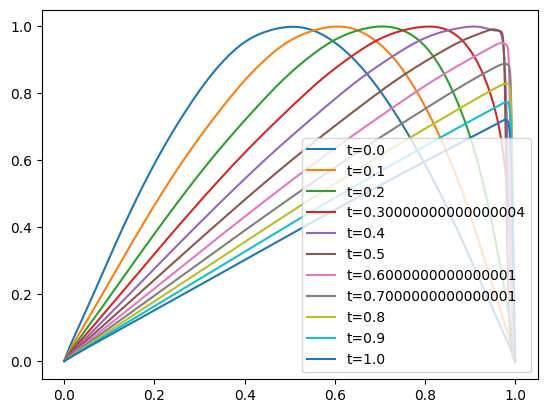

()

In [23]:
invsburgers.Train()

In [24]:
def grad(outputs, inputs):
    return torch.autograd.grad(
        outputs, inputs, grad_outputs=torch.ones_like(outputs), create_graph=True)

#Burgers2
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

class burgers2(torch.nn.Module):
    def __init__(
        self,
        input_dim,
        output_dim,
        initialfunc,
        N=100,
        epochs=1000,
        viscosity=False,
        mu=0.00,
        #loss=nn.MSELoss(),
        lr=1e-4,
        #loss2=None,
        loss2_weight=0.1,
    ): #-> None:
        super().__init__()

        self.epochs = epochs
        #self.loss = loss
        self.loss2_weight = loss2_weight
        self.lr = lr
        self.mu=mu
        self.viscosity=viscosity
        self.N = N
        self.intialfunc=initialfunc

        self.layers = nn.Sequential(
            nn.Linear(input_dim, 20), #the linear transform part https://pytorch.org/docs/stable/generated/torch.nn.Linear.html
            nn.Tanh(), #the activation func I changed to tanh
            nn.Linear(20,20),
            nn.Tanh(),
            nn.Linear(20,20),
            nn.Tanh(),
            nn.Linear(20,20),
            nn.Tanh(),
            nn.Linear(20,20),
            nn.Tanh(),
            nn.Linear(20,20),
            nn.Tanh(),
            nn.Linear(20,20),
            nn.Tanh(),
            nn.Linear(20,20),
            nn.Tanh(),
            nn.Linear(20,20),
            nn.Tanh(),
            nn.Linear(20,20),
            nn.Tanh(),
        )
        self.out = nn.Linear(20, output_dim) #the final transform

    def forward(self, x):
        h = self.layers(x)
        out = self.out(h)
        return out


    def Train(self):
        #print(self.N)

        inputinit = torch.column_stack((torch.tensor([random.random() for i in range(self.N)]), torch.zeros(self.N)))
        k=torch.hstack((torch.zeros(self.N), torch.zeros(self.N)))
        inputboundary = torch.column_stack((k, torch.tensor([random.random() for i in range(2*self.N)])))
        outputinit=self.intialfunc(inputinit[:,0])
        outputboundary= torch.zeros(2*self.N)
        inputs =torch.cat((inputinit, inputboundary))
        Outputs=torch.cat((outputinit, outputboundary))
        cpts = torch.column_stack((torch.tensor([random.random() for i in range(2*self.N)], requires_grad=True), torch.tensor([random.random() for i in range(2*self.N)], requires_grad=True)))

        start=time.time()
        optimiser = optim.Adam(self.parameters(), lr=self.lr)
        self.train() #https://stackoverflow.com/questions/51433378/what-does-model-train-do-in-pytorch


        def loss_g(inputs, outputs):
          loss=(inputs-outputs)**2
          return loss.mean()

        def loss_f(input):
          U=self.Model(input)[:,0]
          a=grad(U,input)[0]
          Ux=a[:,0]
          Ut=a[:,1]
          #Uxx=grad(Ux,input[0])
          return ((Ut+U*Ux)**2).mean()

        def loss_fv(input):
          U=self.Model(input)[:,0]
          a=grad(U,input)[0]
          Ux=a[:,0]
          Ut=a[:,1]
          Uxx=grad(Ux,input[0])
          return ((Ut+U*Ux-self.mu*Uxx)**2).mean()

          if self.viscosity==True:
            loss_f=loss_fv
          else:
            pass

        for ep in range(self.epochs):
            optimiser.zero_grad()
            outputs = self.forward(inputs)
            loss = loss_g(Outputs, outputs[:,0]) + loss_f(cpts)
            loss.backward()
            optimiser.step()
            if ep % int(self.epochs / 10) == 0:
                print(f"Epoch {ep}/{self.epochs}, loss_g: {loss_g(Outputs, outputs[:,0]).item():.5f}, loss_f: {loss_f(cpts).item():.5f}")
                print('time elapsed: {}'.format(time.time()-start))
                t=np.linspace(0,1,11)
                for tm in t:
                  xn=np.linspace(0,1,1000)
                  x=torch.tensor(xn, dtype=default_dtype)
                  coord=torch.column_stack((x,torch.full(x.shape, tm))) #https://pytorch.org/docs/stable/generated/torch.full.html
                  Uout=invsburgers.Model(coord).detach().numpy()
                  plt.plot(xn,Uout, label='t={}'.format(tm))
                  plt.legend()
                plt.show()
        return ()

    def Model(self, X):
        self.eval()
        out = self.forward(X)
        return out #.detach().cpu().numpy()

Epoch 0/30000, loss_g: 0.14502, loss_f: 0.00000
time elapsed: 0.016702890396118164


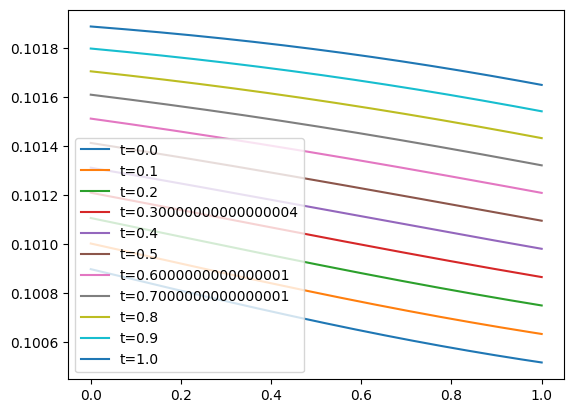

Epoch 3000/30000, loss_g: 0.00156, loss_f: 0.00075
time elapsed: 28.38625741004944


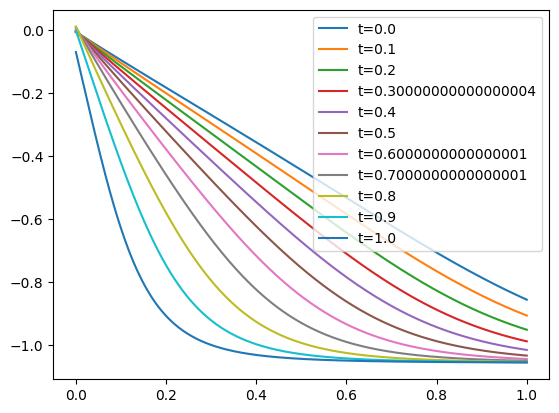

Epoch 6000/30000, loss_g: 0.00020, loss_f: 0.00011
time elapsed: 58.69358801841736


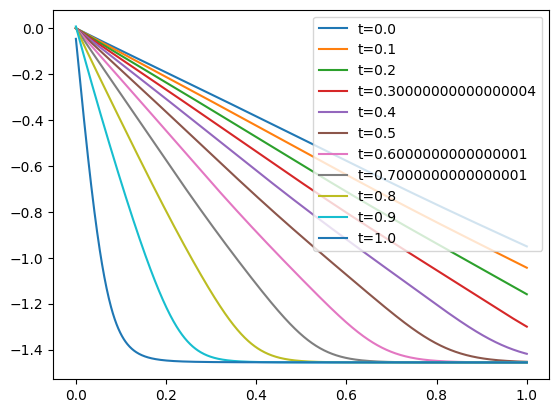

Epoch 9000/30000, loss_g: 0.00001, loss_f: 0.00002
time elapsed: 88.56511402130127


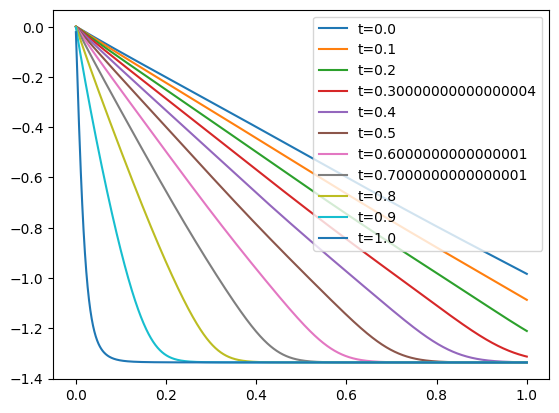

Epoch 12000/30000, loss_g: 0.00000, loss_f: 0.00001
time elapsed: 117.85026335716248


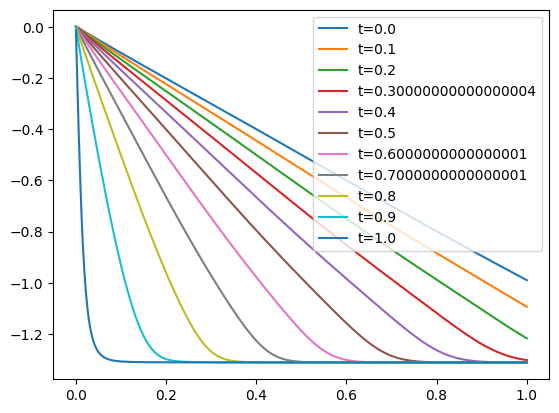

Epoch 15000/30000, loss_g: 0.00000, loss_f: 0.00001
time elapsed: 147.916344165802


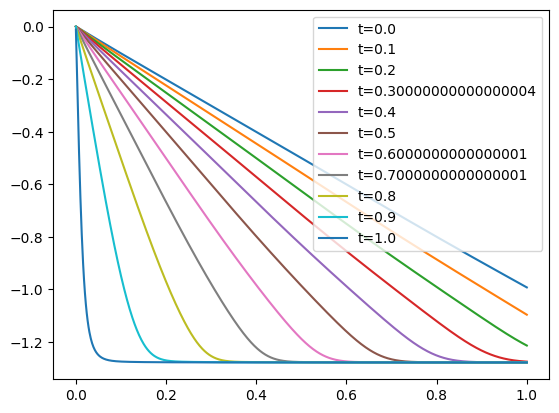

Epoch 18000/30000, loss_g: 0.00000, loss_f: 0.00000
time elapsed: 178.29805040359497


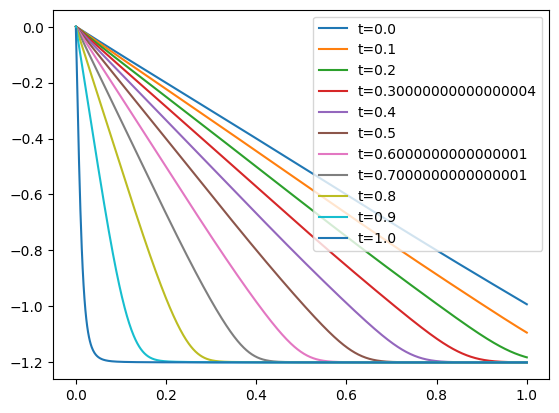

Epoch 21000/30000, loss_g: 0.00000, loss_f: 0.00000
time elapsed: 207.24406671524048


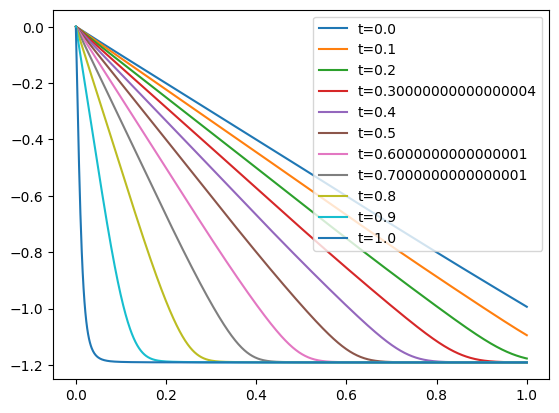

Epoch 24000/30000, loss_g: 0.00000, loss_f: 0.00000
time elapsed: 236.38980102539062


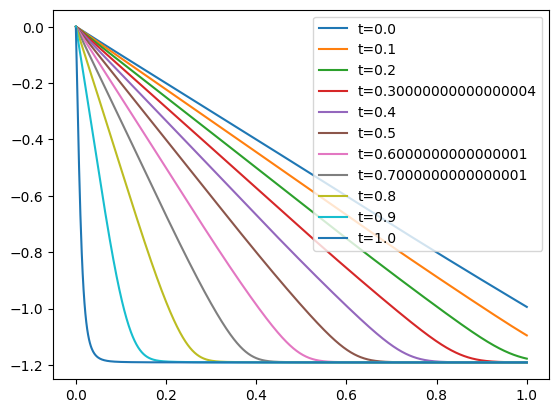

Epoch 27000/30000, loss_g: 0.00000, loss_f: 0.00000
time elapsed: 265.65262365341187


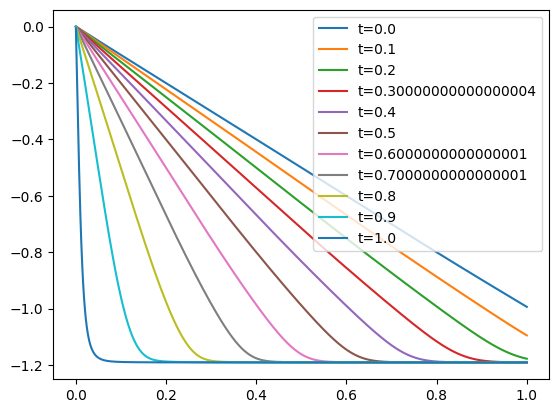

()

In [25]:
def linear(input):
  return -1.00*input

invsburgers=burgers2(2,1,linear, epochs=30000, lr=5e-5, )
invsburgers.Train()

In [33]:
invsburgers.Model(torch.tensor([1.0,0.0]))
invsburgers.Model(torch.tensor([1.0,2.0]))

tensor([-1.1902], grad_fn=<ViewBackward0>)

In [35]:
N=1000
cpts = torch.column_stack((torch.tensor([random.random() for i in range(2*N)], requires_grad=True), torch.tensor([random.random() for i in range(2*N)], requires_grad=True)))
def loss_f(input):
    U=invsburgers.Model(input)[:,0]
    a=grad(U,input)[0]
    Ux=a[:,0]*100
    Ut=a[:,1] *100
    #Uxx=grad(Ux,input[0])
    return ((Ut+U*Ux)**2).mean()

loss_f(cpts)

tensor(62.2573, grad_fn=<MeanBackward0>)

In [ ]:
#??Should be blowing up, right?